# Exploratory Data Analysis (EDA)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [46]:
df = pd.read_csv('iris.data', header=-1)
col_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df.columns = col_names
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris = sns.load_dataset('iris')
iris.head()

In [48]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


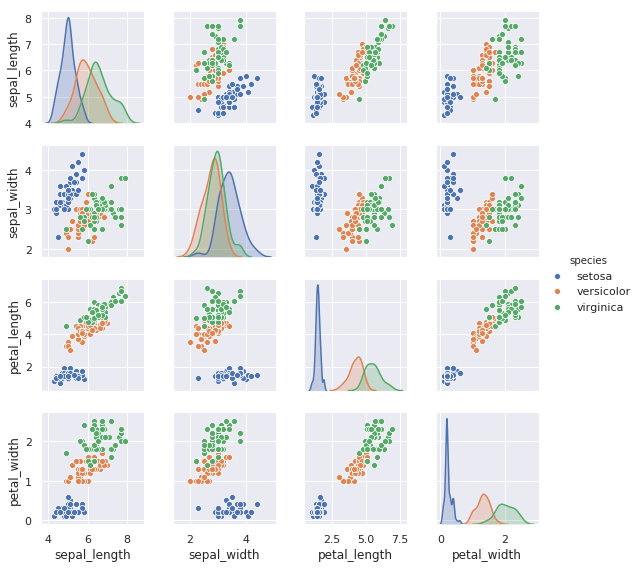

In [50]:
sns.pairplot(iris, hue='species', diag_kind='kde', height=2, aspect=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe75f9144e0>,
      dtype=object)

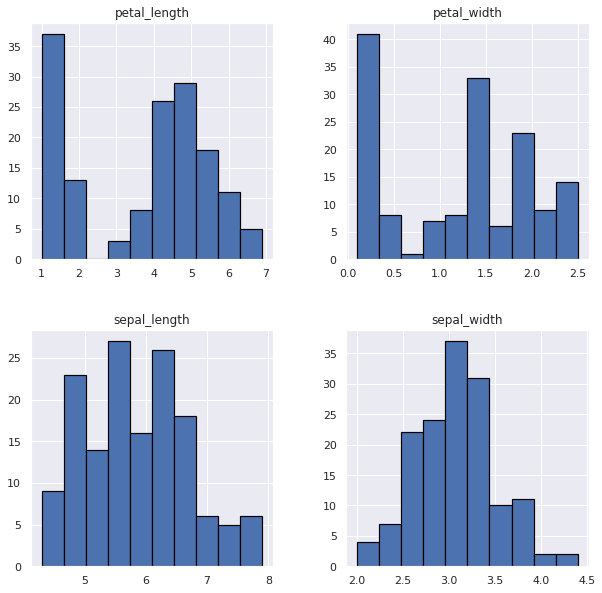

In [51]:
iris.hist(edgecolor='black', linewidth=1.2, figsize=(10,10))

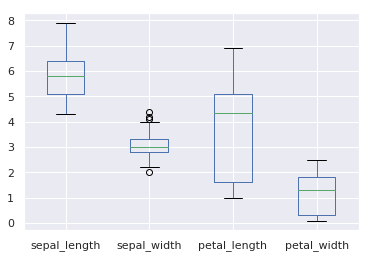

In [52]:
iris.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe75f69bda0>,
      dtype=object)

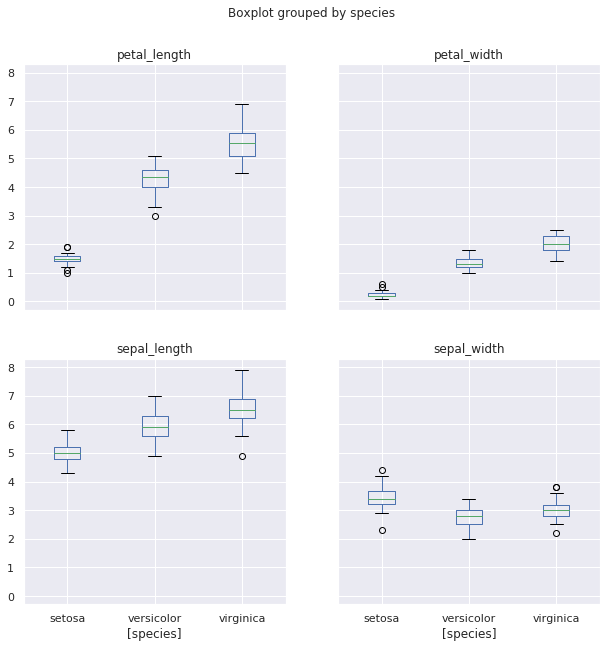

In [53]:
iris.boxplot(by='species',figsize=(10,10))

# Decision tree

In [54]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [55]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [56]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [57]:
# As features, we select only the petals widths and lengs:
x = iris.data[:,2:]
y = iris.target

In [58]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [59]:
clf = clf.fit(x,y)

In [60]:
from sklearn.tree import export_graphviz

In [61]:
export_graphviz(clf, 
                out_file='tree.dot', 
                feature_names=iris.feature_names[2:], 
                class_names=iris.target_names, 
                rounded=True, 
                filled=True)

The next cell is of 'Markdown' type, and apparently it allows for HTML tags. 
After converting the generated tree.dot into a png via writing this in the command line:
dot -Tpng tree.dot -o tree.png
we can insert this text in the next cell

<img src='tree.png', width=50%>

Or we can do it directly in jupyter using graphviz after export_graphviz

<img src='tree.png' width=50%>

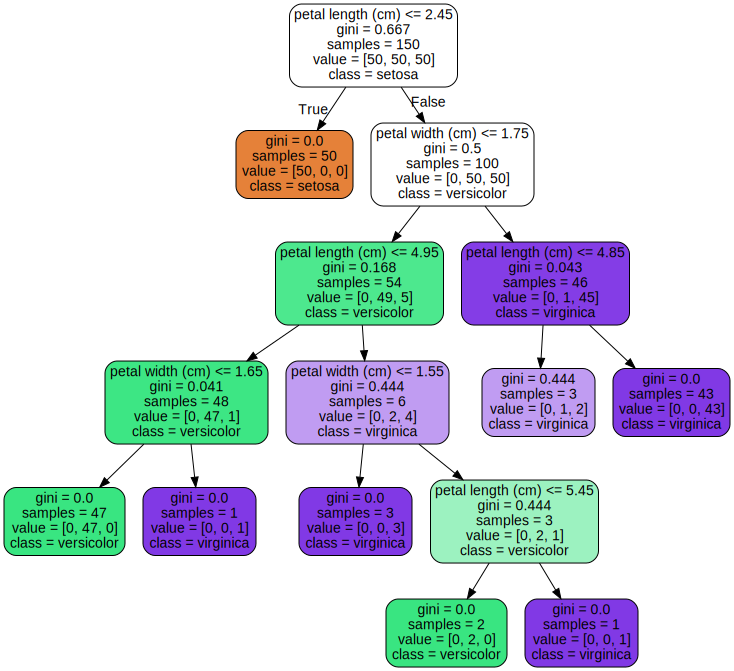

In [62]:
import graphviz
dot_data = export_graphviz(clf, 
                           out_file=None, 
                           feature_names=iris.feature_names[2:], 
                           class_names=iris.target_names, 
                           rounded=True, 
                           filled=True)
graph = graphviz.Source(dot_data)
graph

# visualize the Decision Boundary

Now we'll visualize the tree in a different way. 
We'll plot the scatter plot of the 2 features that we are using for the tree, 
separated in different colors for the different classes
Then we'll build a fine 2D mesh and predict the class for all those points, 
and we'll see how the tree compartimentalizes the space. 

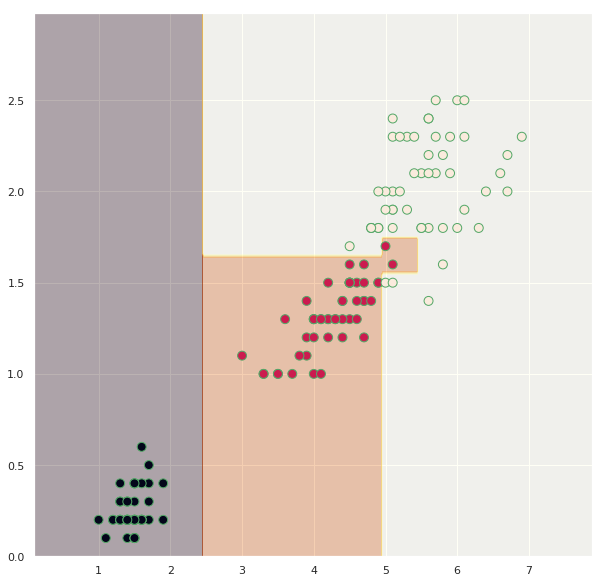

In [63]:
df = pd.read_csv('iris.data', header=-1)
col_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df.columns = col_names

x = df.loc[:,['petal length', 'petal width']].values
y = df['class']

species_to_num = {'Iris-setosa': 0,
                 'Iris-versicolor': 1,
                 'Iris-virginica': 2}
xv = x.reshape(-1,1)
yv = y.map(species_to_num)
xmin, xmax = xv.min(), xv.max()+1
ymin, ymax = yv.min(), yv.max()+1
h=0.02
xx, yy = np.meshgrid(np.arange(xmin,xmax,h),
                     np.arange(ymin,ymax,h))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(10,10))
plt.contourf(xx,yy,z, cmap='afmhot', alpha=0.3)
plt.scatter(x[:,0],x[:,1], c=yv, s=80, edgecolors='g')

In [114]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
params = {"max_depth": list(range(1,10)), "min_samples_leaf": list(range(1,20))}
#params = {"min_samples_leaf": list(range(1,20))}


In [115]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [116]:
gscv = GridSearchCV (clf, params)

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split (x,yv,test_size=0.1,random_state=42)

In [118]:
gscv.fit(X_train,Y_train)

/home/ricardo/work/software/miniconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ricardo/work/software/miniconda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7,

In [119]:
gscv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [127]:
Y_test_pred = gscv.predict(X_test)
Y_train_pred = gscv.predict(X_train)

In [131]:
accuracy_score(Y_train,Y_train_pred)

0.9777777777777777

In [132]:
accuracy_score(Y_test,Y_test_pred)

1.0

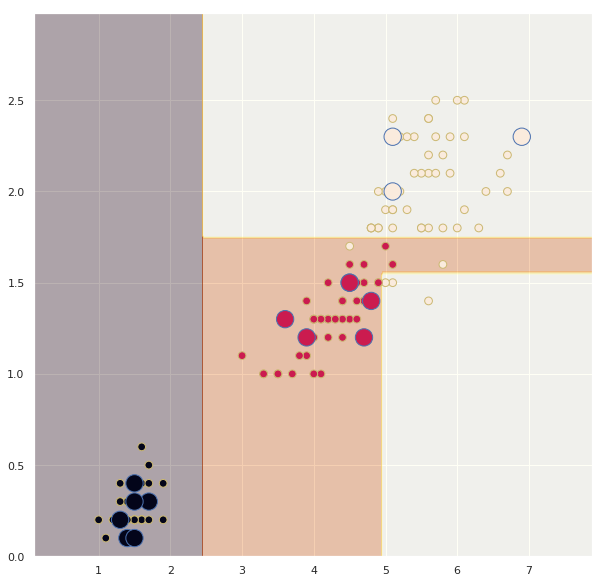

In [138]:
z = gscv.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(10,10))
plt.contourf(xx,yy,z, cmap='afmhot', alpha=0.3)
#plt.scatter(x[:,0],x[:,1], c=yv, s=80, edgecolors='g')
plt.scatter(X_train[:,0],X_train[:,1], c=Y_train, s=60, edgecolors='y')
plt.scatter(X_test[:,0],X_test[:,1], c=Y_test, s=300, edgecolors='b')